<br/>

## Tarea 7 - Evaluación de los modelos parte II
### Alumno - Sebastián Ituarte
<span style="color:green"><b>Minería de datos empresariales</b></span>

---

In [4]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import SVC

## Actividad 1

In [5]:
# Cargar el archivo CSV
df = pd.read_csv("OnlineNewsPopularity.csv")

In [6]:
# Imprimimos características
print("Características del Dataframe")
num_filas, num_columnas = df.shape
print(df.shape)

# Cantidad de registros filas
print("Cantidad de filas")
print(num_filas)

# Cantidad de características columnas
print("Cantidad de columnas")
print(num_columnas)

# Imprimimos los nombres de las columnas
print("\n")
print("Nombre de sus columnas")
print(df.columns)

Características del Dataframe
(39644, 61)
Cantidad de filas
39644
Cantidad de columnas
61


Nombre de sus columnas
Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_w

In [7]:
# Visualizar las primeras filas del dataset
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
# Obtener un resumen estadístico de los datos
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [9]:
# Estudiamos el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

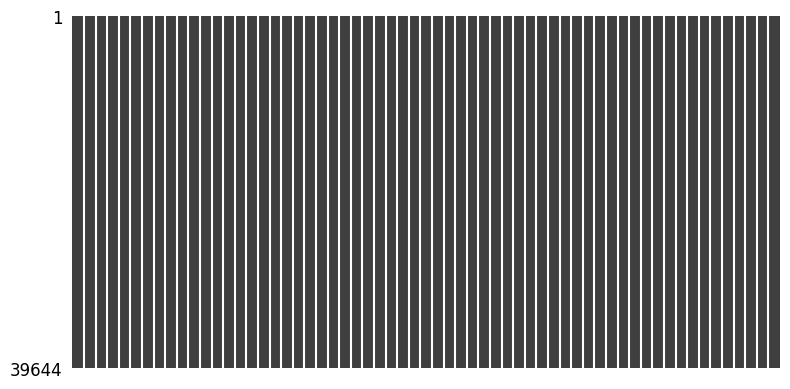

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))

msno.matrix(df, ax=ax, sparkline=False, fontsize=10)
plt.tight_layout()
plt.show();

In [11]:
# Mostrar si hay valores ausentes
missing_values = df.isnull().sum()
print(f"Valores ausentes por atributo:\n{missing_values}")

Valores ausentes por atributo:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


In [12]:
df.isnull().sum().sum()

0

In [13]:
# Registrar si hay duplicados
duplicated_rows = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicated_rows}")

Cantidad de filas duplicadas: 0


### Selección de Variables Importantes

Para la selección de variables importantes, se han considerado cinco características que, por su naturaleza, pueden influir directamente en la popularidad de un artículo. Aquí están las variables seleccionadas y las razones detrás de su elección:

1. **n_tokens_title**: Cantidad de palabras del título.
   - **Razón**: Los títulos son cruciales para captar la atención de los lectores. Un título bien elaborado puede aumentar la probabilidad de que un artículo sea leído y compartido.

2. **n_tokens_content**: Cantidad de palabras del contenido.
   - **Razón**: La longitud del contenido puede influir en la profundidad y calidad percibida del artículo. Artículos más largos pueden proporcionar más información, lo que puede afectar su popularidad.

3. **num_imgs**: Cantidad de imágenes.
   - **Razón**: Las imágenes hacen que el contenido sea más atractivo visualmente. La inclusión de imágenes puede aumentar el interés del lector y la probabilidad de que el artículo sea compartido.

4. **num_videos**: Cantidad de videos.
   - **Razón**: Los videos pueden complementar el contenido textual y proporcionar una experiencia más interactiva y atractiva. Los artículos con videos pueden tener una mayor probabilidad de ser compartidos debido a su contenido multimedia.

5. **average_token_length**: Longitud promedio de las palabras del contenido.
   - **Razón**: La complejidad del lenguaje utilizado en el artículo puede influir en la percepción de su calidad. Un promedio de longitud de palabras más alto puede indicar un contenido más sofisticado.

In [14]:
# Selección de variables
selected_columns = [
    "n_tokens_title",
    "n_tokens_content",
    "num_imgs",
    "num_videos",
    "average_token_length",
]

Las variables seleccionadas para el análisis son continuas. A continuación, se describe cada una de ellas:

1. **n_tokens_title**: Cantidad de palabras del título (continua).
2. **n_tokens_content**: Cantidad de palabras del contenido (continua).
3. **num_imgs**: Cantidad de imágenes (discreta pero tratada como continua debido a la naturaleza de su conteo).
4. **num_videos**: Cantidad de videos (discreta pero tratada como continua debido a la naturaleza de su conteo).
5. **average_token_length**: Longitud promedio de las palabras del contenido (continua).
6. **shares**: Cantidad de veces que se compartió el artículo (continua antes de la discretización).

### Discretizar la variable shares en tres categorías

In [15]:
# Eliminar espacios en blanco en los nombres de las columnas
df.columns = df.columns.str.strip()

In [16]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [17]:
# Quitar columna url del dataframe
df.drop(columns=["url"], inplace=True)

In [18]:
# Quitar observaciones con valores en 'shares' < 5000
df = df[df["shares"] < 5000]

In [19]:
# Discretizar la variable 'shares' en tres categorías
bins = [0.999, 1000, 1700, 4900]
labels = ["Menor", "Medio", "Superior"]
df.loc[:, "shares"] = pd.cut(df["shares"], bins=bins, labels=labels)

In [20]:
df["shares"].value_counts()

,count
shares,
Menor,12424
Medio,11131
Superior,10909


In [21]:
# Imprimimos características
print("Características del Dataframe")
num_filas, num_columnas = df.shape
print(df.shape)

# Filas eliminadas
print("\n")
print("Filas eliminadas")
print(39644 - num_filas)

Características del Dataframe
(34464, 60)


Filas eliminadas
5180


In [22]:
df_selected = df[selected_columns]

# Visualizar las primeras filas del dataset seleccionado
df_selected.head()

,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length
0,12.0,219.0,1.0,0.0,4.680365
1,9.0,255.0,1.0,0.0,4.913725
2,9.0,211.0,1.0,0.0,4.393365
3,9.0,531.0,1.0,0.0,4.404896
4,13.0,1072.0,20.0,0.0,4.682836


In [23]:
# Estudiamos el DataFrame
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34464 entries, 0 to 39643
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_tokens_title        34464 non-null  float64
 1   n_tokens_content      34464 non-null  float64
 2   num_imgs              34464 non-null  float64
 3   num_videos            34464 non-null  float64
 4   average_token_length  34464 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [24]:
# Obtener un resumen estadístico de los datos
df_selected.describe()

,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length
count,34464.000000,34464.000000,34464.000000,34464.000000,34464.000000
mean,10.406366,545.387796,4.310875,1.186571,4.561448
std,2.107614,460.455509,8.036603,3.968795,0.815648
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,250.000000,1.000000,0.000000,4.483022
50%,10.000000,414.000000,1.000000,0.000000,4.669054
75%,12.000000,712.250000,3.000000,1.000000,4.859454
max,20.000000,7764.000000,128.000000,75.000000,8.041534


In [25]:
# Mostrar si hay valores ausentes
missing_values = df_selected.isnull().sum()
print(f"Valores ausentes por atributo:\n{missing_values}")

Valores ausentes por atributo:
n_tokens_title          0
n_tokens_content        0
num_imgs                0
num_videos              0
average_token_length    0
dtype: int64


In [26]:
df_selected.head()

,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length
0,12.0,219.0,1.0,0.0,4.680365
1,9.0,255.0,1.0,0.0,4.913725
2,9.0,211.0,1.0,0.0,4.393365
3,9.0,531.0,1.0,0.0,4.404896
4,13.0,1072.0,20.0,0.0,4.682836


### Análisis de Estadística Descriptiva

In [27]:
# Función para detectar outliers usando IQR
def detect_outliers(df, column):
    if df[column].dtype in ["int64", "float64"]:
        Q1 = np.quantile(df[column], 0.25)
        Q3 = np.quantile(df[column], 0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

In [28]:
# Mostrar la cantidad de outliers para cada columna
for column in df_selected.columns:
    outliers_count = detect_outliers(df, column)
    print(f"{column}: {outliers_count} outliers")

n_tokens_title: 128 outliers
n_tokens_content: 1665 outliers
num_imgs: 6976 outliers
num_videos: 2446 outliers
average_token_length: 1351 outliers


In [29]:
def estadistica(data, var):
    q1 = np.percentile(data[var], 25)
    q3 = np.percentile(data[var], 75)
    iqr = q3 - q1

    data_estadistica = {
        "media": np.mean(data[var]),
        "desviacion_std": np.std(data[var], ddof=1),
        "mediana": np.median(data[var]),
        "varianza": np.var(data[var], ddof=1),
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
    }

    print(f"Datos estadisticos para variable - {var}")
    print(data_estadistica)


# Analizamos las variables previo a crear los gráficos
for variable in df_selected.columns:
    estadistica(df, variable)
    print("\n")

Datos estadisticos para variable - n_tokens_title
{'media': 10.406366063138348, 'desviacion_std': 2.1076135179850644, 'mediana': 10.0, 'varianza': 4.44203474119338, 'q1': 9.0, 'q3': 12.0, 'iqr': 3.0}


Datos estadisticos para variable - n_tokens_content
{'media': 545.3877959610028, 'desviacion_std': 460.4555093560133, 'mediana': 414.0, 'varianza': 212019.27609630564, 'q1': 250.0, 'q3': 712.25, 'iqr': 462.25}


Datos estadisticos para variable - num_imgs
{'media': 4.310875116063138, 'desviacion_std': 8.036602863083706, 'mediana': 1.0, 'varianza': 64.58698557892522, 'q1': 1.0, 'q3': 3.0, 'iqr': 2.0}


Datos estadisticos para variable - num_videos
{'media': 1.186571494893222, 'desviacion_std': 3.9687954759286614, 'mediana': 0.0, 'varianza': 15.75133752975181, 'q1': 0.0, 'q3': 1.0, 'iqr': 1.0}


Datos estadisticos para variable - average_token_length
{'media': 4.5614476514306785, 'desviacion_std': 0.8156480840781399, 'mediana': 4.66905375903, 'varianza': 0.6652817970603405, 'q1': 4.4830224

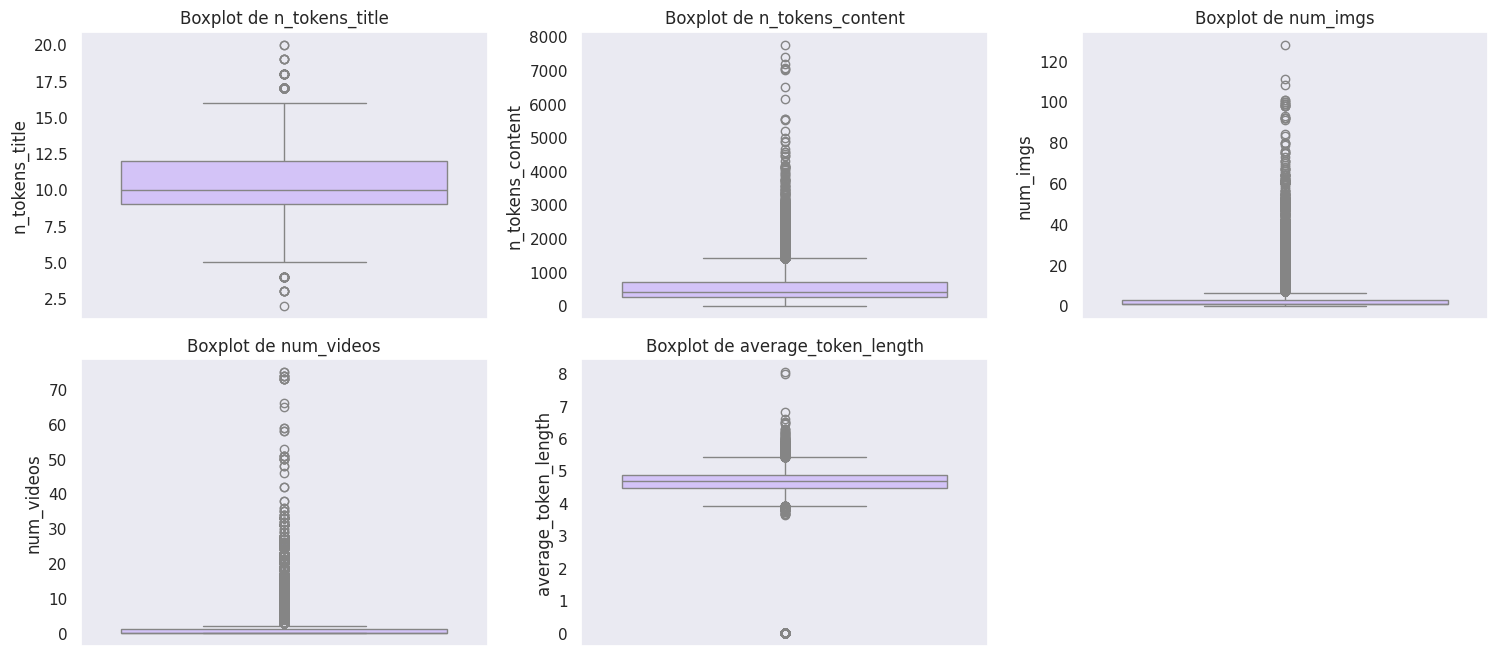

In [30]:
# Crear los boxplots
sns.set_theme(style="dark", palette="pastel")
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_selected.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column, color="m")
    plt.title(f"Boxplot de {column}")
plt.tight_layout()
plt.show()

## Interpretación de los Boxplots

### n_tokens_title:

- La mediana de la cantidad de palabras en el título está alrededor de 10.
- El rango intercuartílico (IQR) está entre aproximadamente 9 y 12.
- Hay algunos valores atípicos (outliers) por encima y por debajo del rango intercuartílico.

### n_tokens_content:

- La mediana de la cantidad de palabras en el contenido es alrededor de 400.
- El IQR está entre aproximadamente 250 y 700.
- Hay una gran cantidad de valores atípicos muy por encima del IQR, indicando que algunos artículos tienen una cantidad significativamente mayor de palabras en el contenido.

### num_imgs:

- La mediana del número de imágenes en los artículos es alrededor de 1.
- El IQR está entre 0 y 4.
- Hay muchos valores atípicos muy por encima del IQR, con algunos artículos teniendo hasta más de 100 imágenes.

### num_videos:

- La mediana del número de videos en los artículos es 0.
- El IQR está entre 0 y 1.
- Existen muchos valores atípicos, con algunos artículos teniendo más de 60 videos.

### average_token_length:

- La mediana de la longitud promedio de las palabras está alrededor de 4.6.
- El IQR está entre aproximadamente 4.4 y 4.8.
- Hay algunos valores atípicos por debajo y por encima del IQR, aunque no son tan extremos como en otras variables.

## Conclusiones

- **Valores Atípicos:** Muchas de las variables contienen valores atípicos significativos, especialmente `n_tokens_content`, `num_imgs` y `num_videos`. Esto sugiere que mientras la mayoría de los artículos tienen valores moderados, hay un número de artículos que son extremadamente largos o contienen muchas imágenes/videos. Da la sensación de que son datos erróneos artículos con más de 60 videos o 100 imágenes, por lo que estudiaría la posibilidad de borrar estos valores atípicos para estas categorías haciendo un análisis más profundo.
- **Distribución:** La distribución de la mayoría de las variables es sesgada, con un gran número de valores en la parte inferior del rango y algunos valores muy altos.
- **Medianas y Rango Intercuartílico:** Las medianas y los rangos intercuartílicos nos proporcionan una buena idea del rango típico de valores para la mayoría de los artículos. Por ejemplo, la mayoría de los artículos tienen títulos con aproximadamente 10 palabras y contenido de alrededor de 400 palabras.


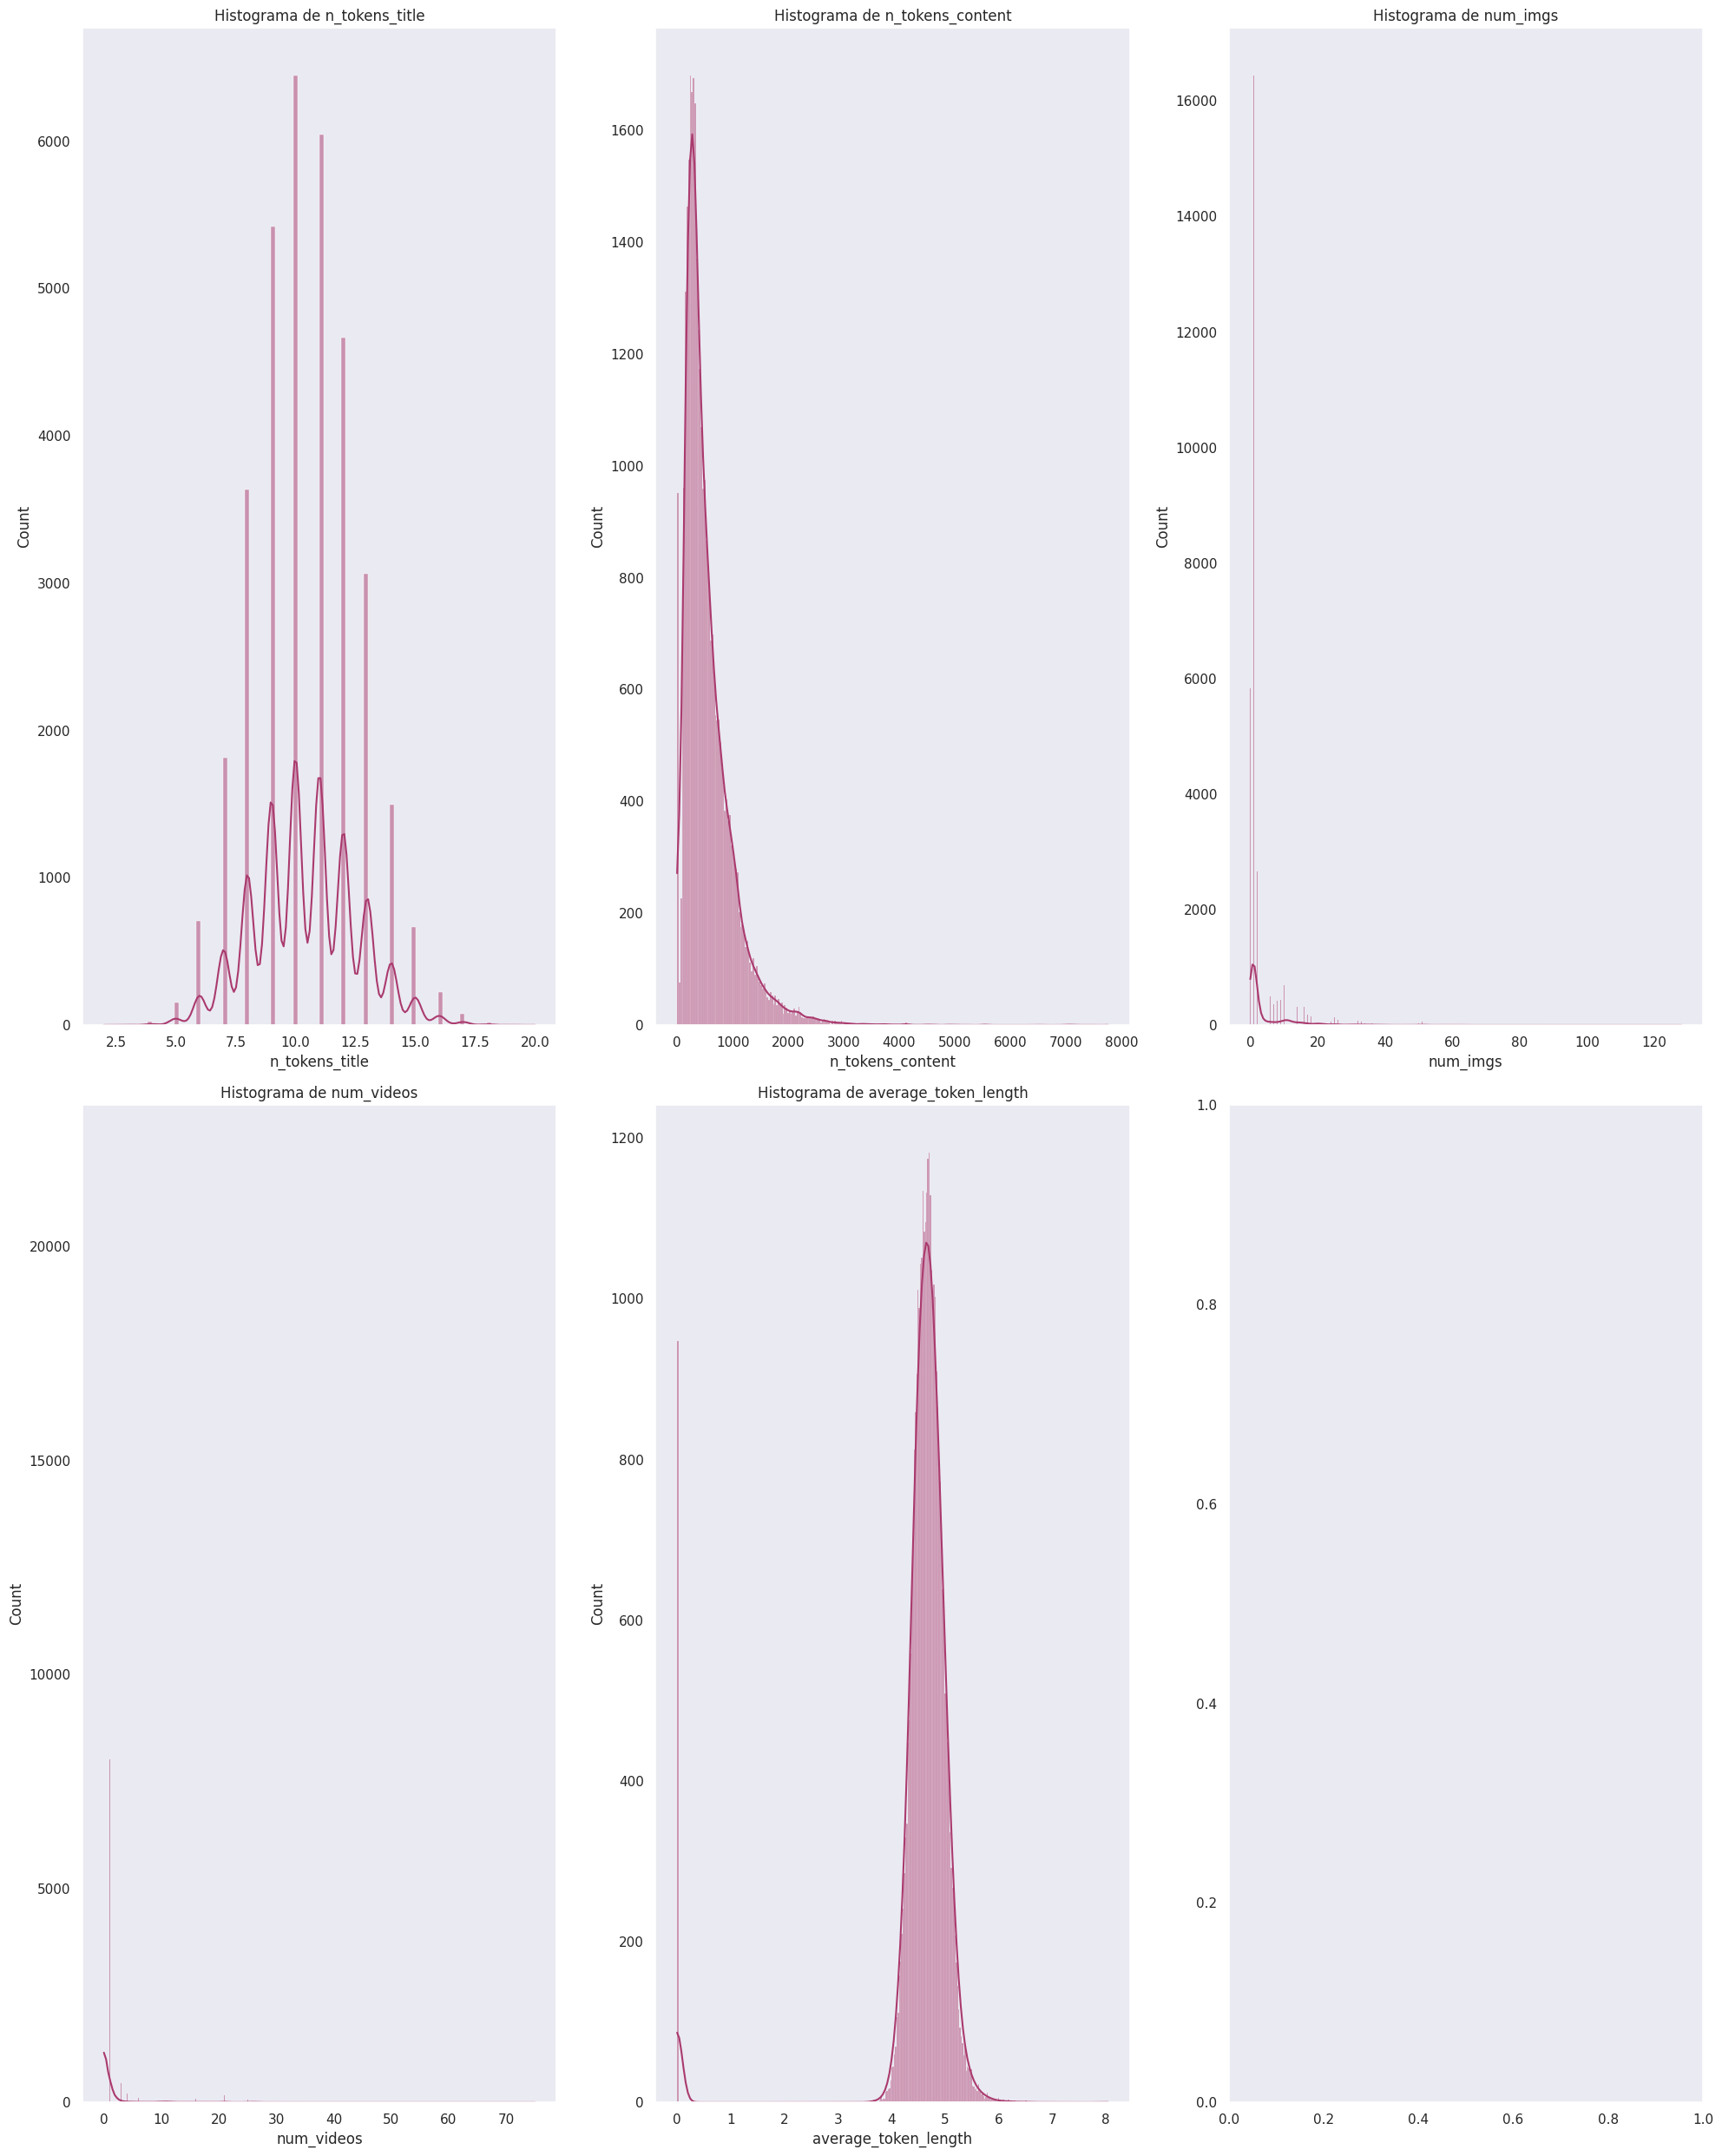

In [31]:
# Crear la figura y los ejes
num_columns = 3
num_rows = (len(df_selected.columns) + num_columns - 1) // num_columns
fig, ax = plt.subplots(num_rows, num_columns, figsize=(20, 25))

sns.set_theme(style="darkgrid")

# Definir colores
hist_palette = sns.color_palette("flare", as_cmap=True)
bar_palette = sns.color_palette("pastel")

# Crear histogramas para cada variable seleccionada usando Seaborn
for i, column in enumerate(df_selected.columns):
    row = i // num_columns
    col_pos = i % num_columns
    sns.histplot(
        df_selected[column],
        kde=True,
        ax=ax[row, col_pos],
        color=hist_palette(0.6),
    )
    ax[row, col_pos].set_title(f"Histograma de {column}")

plt.tight_layout()
plt.show()

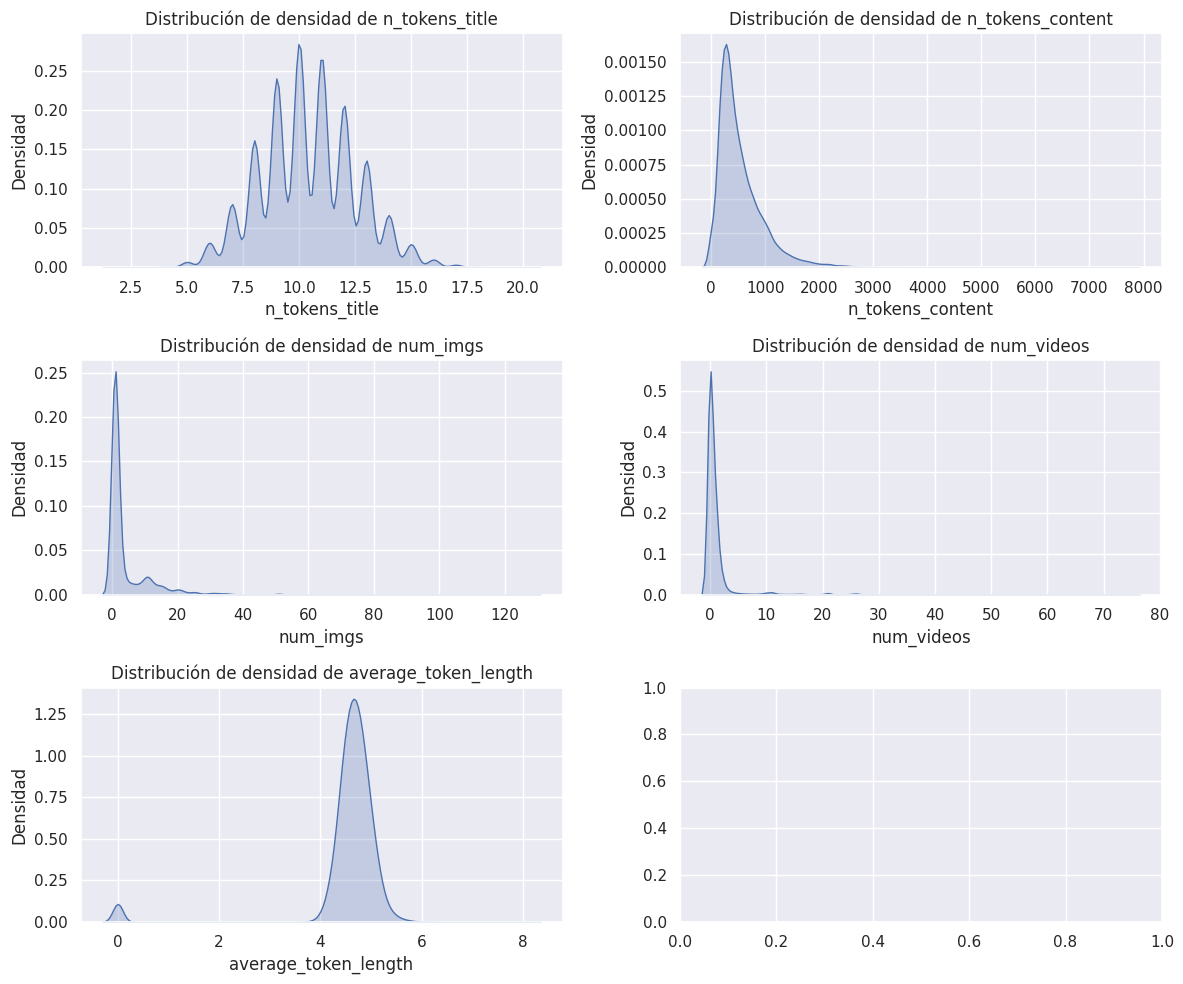

In [32]:
# Generar gráficos de densidad para cada variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(df_selected.columns):
    sns.kdeplot(df_selected[column], ax=axes[i], fill=True)
    axes[i].set_title(f"Distribución de densidad de {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Densidad")

plt.tight_layout()
plt.show()

## Interpretación de los Gráficos

### n_tokens_title:

- La distribución muestra varios picos alrededor de los valores de 8 a 12, con un pico notable alrededor de 10 palabras en el título.
- Esto indica que la mayoría de los títulos de los artículos tienen entre 8 y 12 palabras, siendo 10 palabras el valor más común.

### n_tokens_content:

- La distribución está altamente sesgada a la derecha, con la mayoría de los artículos teniendo un contenido con menos de 1000 palabras.
- Hay una larga cola que se extiende hasta 8000 palabras, indicando que aunque la mayoría de los artículos tienen menos de 1000 palabras, hay algunos artículos con un contenido significativamente más largo.

### num_imgs:

- La distribución muestra un pico muy alto cerca de 0, lo que indica que la mayoría de los artículos tienen muy pocas imágenes.
- Hay una cola larga que se extiende hasta más de 100 imágenes, lo que indica que algunos artículos tienen un número muy alto de imágenes, aunque son excepciones de seguro datos erroneos.

### num_videos:

- Similar a `num_imgs`, la distribución está altamente sesgada a la derecha, con un pico muy alto cerca de 0, indicando que la mayoría de los artículos no tienen videos o tienen muy pocos.
- Hay una cola larga que se extiende hasta más de 70 videos, indicando que aunque es raro, algunos artículos tienen un número muy alto de videos de seguro datos erroneos.

### average_token_length:

- La distribución de la longitud promedio de las palabras es bastante simétrica y tiene un pico alrededor de 4.5.
- Esto sugiere que la longitud promedio de las palabras en los artículos es consistentemente alrededor de 4.5 caracteres.

### Análisis del Heatmap de Correlación

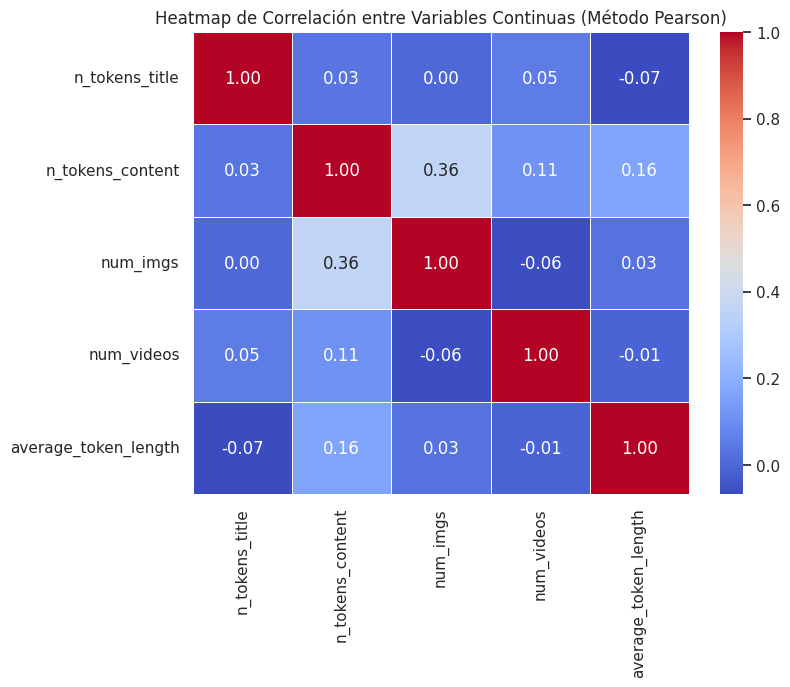

In [33]:
# Calcular la matriz de correlación usando el método de Pearson
correlation_matrix = df_selected.corr(method="pearson")

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables Continuas (Método Pearson)")
plt.show()

## Interpretación del Heatmap de Correlación

### n_tokens_title:

- No tiene una correlación fuerte con ninguna de las otras variables.
- Correlación más alta con `num_videos` (0.05), pero sigue siendo muy baja.
- Correlación negativa ligera con `average_token_length` (-0.07).

### n_tokens_content:

- Tiene una correlación moderada con `num_imgs` (0.36), lo que sugiere que los artículos con más contenido tienden a tener más imágenes.
- Correlaciones bajas con las demás variables, incluyendo `num_videos` (0.11) y `average_token_length` (0.16).

### num_imgs:

- Correlación moderada con `n_tokens_content` (0.36), lo que indica que los artículos más largos tienden a incluir más imágenes.
- Correlaciones muy bajas con las demás variables, incluyendo una ligera correlación negativa con `num_videos` (-0.06).

### num_videos:

- Correlaciones muy bajas con todas las demás variables.
- La correlación más alta es con `n_tokens_content` (0.11), pero sigue siendo baja.

### average_token_length:

- Correlaciones muy bajas con todas las demás variables.
- La correlación más alta es con `n_tokens_content` (0.16).

## Conclusiones

### Correlación Moderada:

- La única correlación moderada es entre `n_tokens_content` y `num_imgs` (0.36). Esto sugiere que los artículos con más contenido tienden a incluir más imágenes.

### Correlaciones Bajas o Nulas:

- La mayoría de las otras variables no tienen correlaciones significativas entre sí.
- Las correlaciones más altas son aún bastante bajas, indicando que las variables seleccionadas no están fuertemente relacionadas.

## Implicaciones

### Modelado:

- Las correlaciones bajas entre la mayoría de las variables sugieren que cada variable puede proporcionar información única y no redundante en el contexto del modelado predictivo.

### Exploración Adicional:

- Podría ser útil explorar otras variables o combinaciones de variables para entender mejor las relaciones y su impacto potencial en la predicción de la popularidad de los artículos.


In [34]:
# Agregamos la columna shares para poder hacer las comparativas en los siguientes plots
df_selected = df_selected.copy()
df_selected.loc[:, "shares"] = df["shares"]

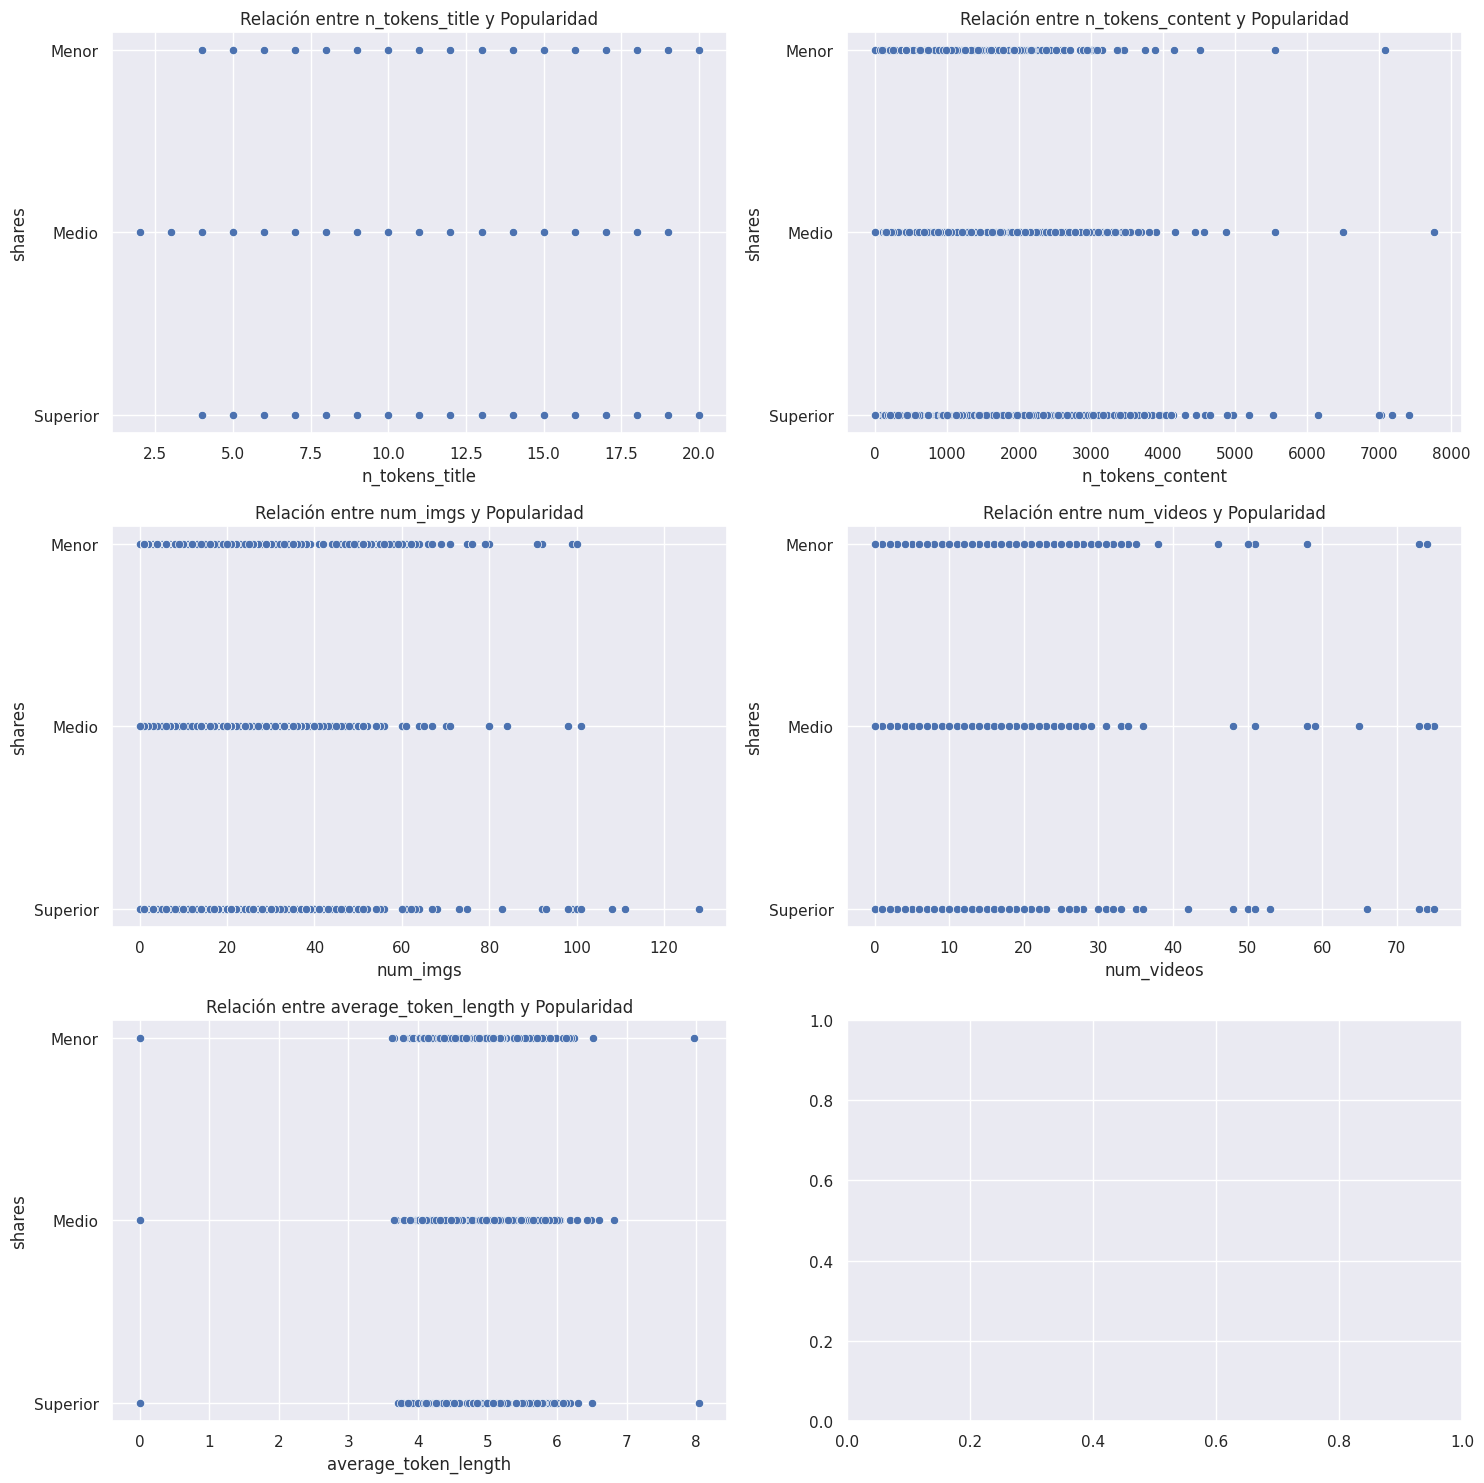

In [35]:
# Gráficos de dispersión
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(df_selected.columns[:-1]):
    sns.scatterplot(x=df_selected[column], y=df_selected["shares"], ax=axes[i])
    axes[i].set_title(f"Relación entre {column} y Popularidad")

plt.tight_layout()
plt.show()

### Relación entre n_tokens_title y Popularidad:

- No se observa una clara tendencia entre la cantidad de palabras en el título y la popularidad.
- Las tres categorías de popularidad (Menor, Medio, Superior) están distribuidas de manera similar a lo largo de diferentes longitudes de título.

### Relación entre n_tokens_content y Popularidad:

- Similarmente, no se observa una clara tendencia entre la cantidad de palabras en el contenido y la popularidad.
- Los artículos en todas las categorías de popularidad (Menor, Medio, Superior) parecen tener una amplia variedad de longitudes de contenido.

### Relación entre num_imgs y Popularidad:

- La cantidad de imágenes no parece estar claramente relacionada con la popularidad.
- Las categorías de popularidad tienen distribuciones similares en términos de número de imágenes.

### Relación entre num_videos y Popularidad:

- Al igual que con las imágenes, el número de videos no muestra una clara relación con la popularidad.
- Las tres categorías de popularidad tienen distribuciones similares respecto al número de videos.

### Relación entre average_token_length y Popularidad:

- No hay una relación evidente entre la longitud promedio de las palabras y la popularidad.
- Las categorías de popularidad están distribuidas de manera similar en términos de la longitud promedio de las palabras.

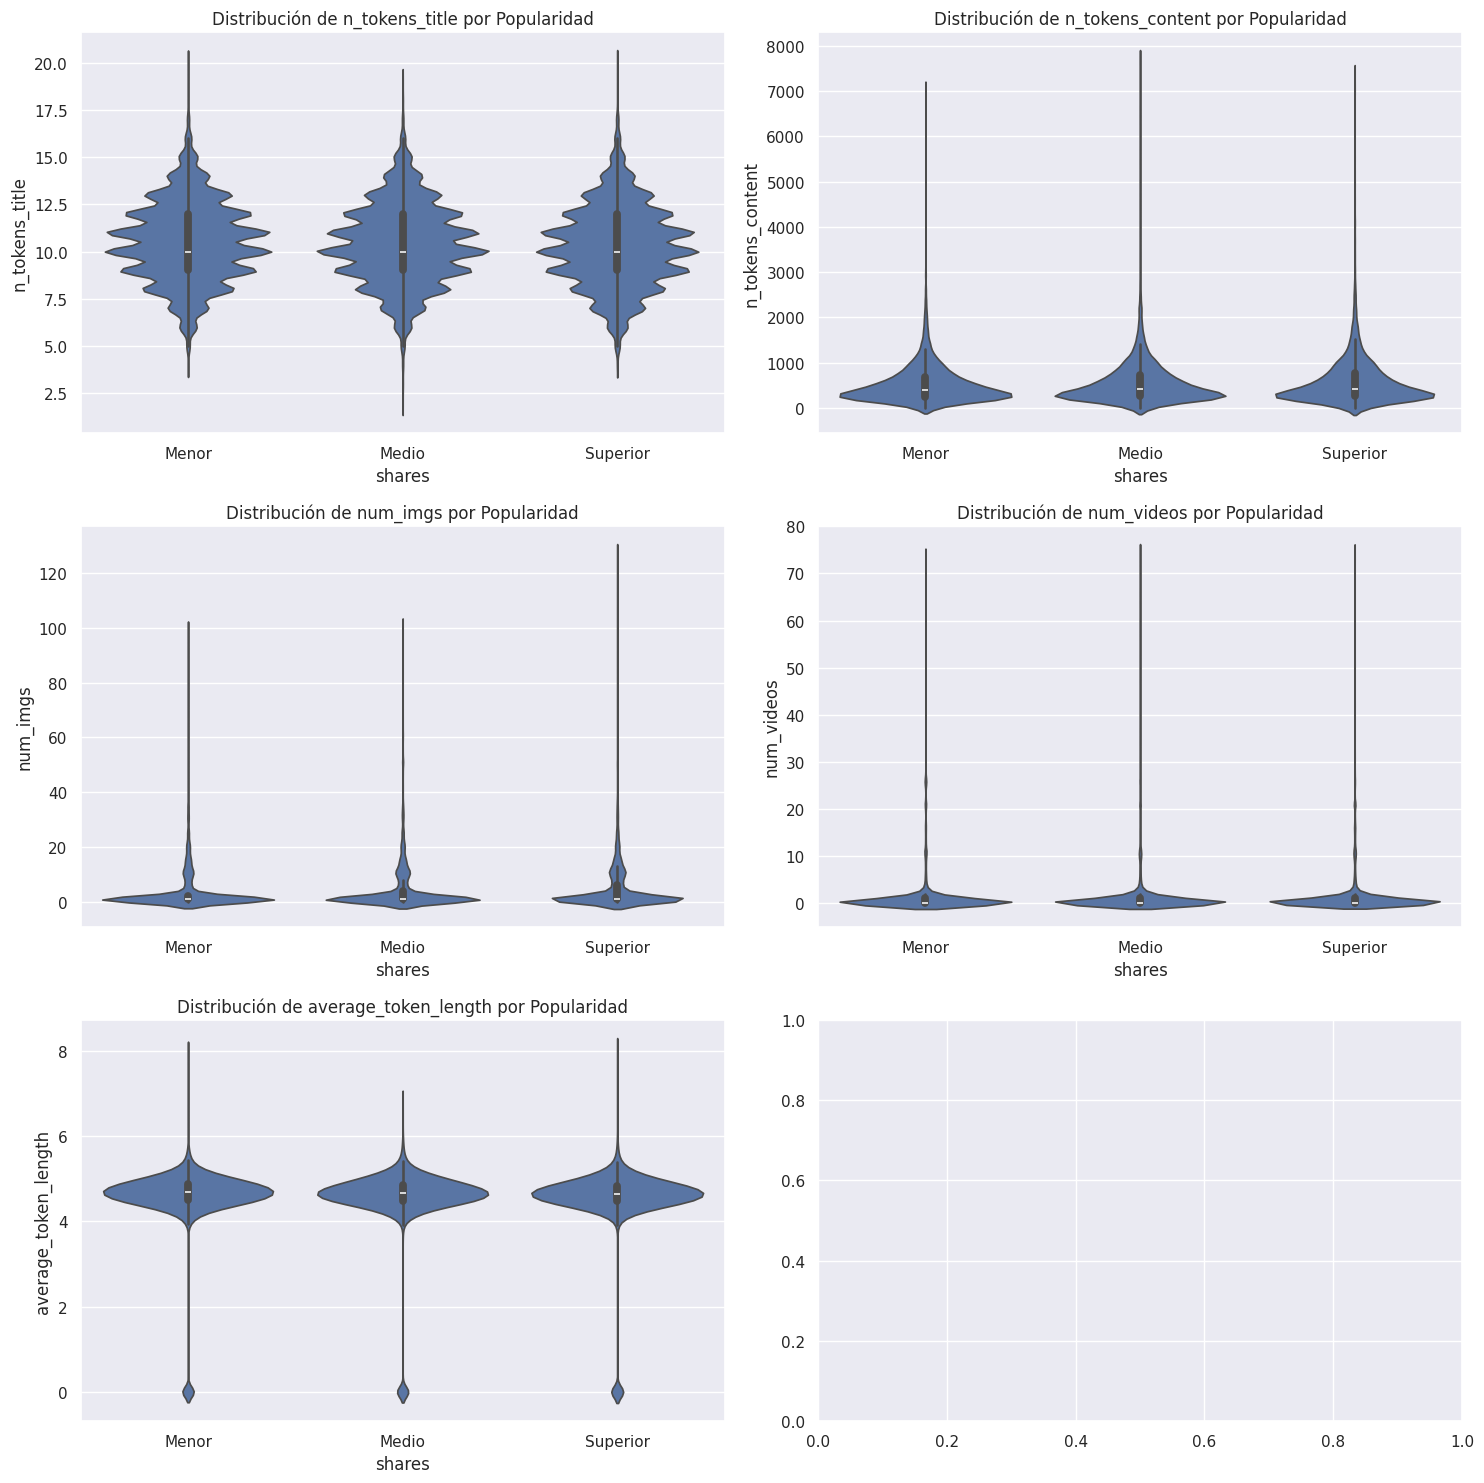

In [36]:
# Diagramas de violín
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(df_selected.columns[:-1]):
    sns.violinplot(x="shares", y=column, data=df_selected, ax=axes[i])
    axes[i].set_title(f"Distribución de {column} por Popularidad")

plt.tight_layout()
plt.show()

### Distribución de n_tokens_title por Popularidad:

- La distribución de la cantidad de palabras en el título es bastante similar para las tres categorías de popularidad.
- Los artículos con cualquier nivel de popularidad tienden a tener una longitud de título similar, con la mayoría concentrándose alrededor de 8-12 palabras.

### Distribución de n_tokens_content por Popularidad:

- La distribución de la cantidad de palabras en el contenido también es similar para las tres categorías de popularidad.
- La mayoría de los artículos tienen menos de 1000 palabras, independientemente de su popularidad, aunque hay algunos artículos más largos en todas las categorías.

### Distribución de num_imgs por Popularidad:

- La distribución del número de imágenes en los artículos es bastante similar entre las tres categorías de popularidad.
- La mayoría de los artículos tienen pocas imágenes (cerca de 0 a 10), sin importar su popularidad.

### Distribución de num_videos por Popularidad:

- Al igual que con las imágenes, el número de videos en los artículos es similar entre las diferentes categorías de popularidad.
- La mayoría de los artículos tienen 0 a pocos videos, independientemente de su popularidad.

### Distribución de average_token_length por Popularidad:

- La longitud promedio de las palabras es bastante consistente entre las tres categorías de popularidad.
- La mayoría de las palabras tienen una longitud promedio de alrededor de 4.5 caracteres, sin importar el nivel de popularidad del artículo.

## Conclusiones

### Distribuciones Similares:

- Las distribuciones de las variables `n_tokens_title`, `n_tokens_content`, `num_imgs`, `num_videos` y `average_token_length` son bastante similares entre las tres categorías de popularidad (Menor, Medio, Superior).

### Consistencia en Longitudes y Cantidades:

- Los artículos tienden a tener longitudes de título y contenido, cantidades de imágenes y videos similares, independientemente de su popularidad.

### Longitud Promedio de Palabras:

- La longitud promedio de las palabras en los artículos es consistente, alrededor de 4.5 caracteres, para todas las categorías de popularidad.


## Actividad 2

In [37]:
df["shares"].unique()

['Menor', 'Medio', 'Superior']
Categories (3, object): ['Menor' < 'Medio' < 'Superior']

In [38]:
# Convertir 'shares' a etiquetas numéricas
label_encoder = LabelEncoder()
df["shares"] = label_encoder.fit_transform(df["shares"])

In [39]:
df["shares"].unique()

array([1, 0, 2])

In [40]:
label_encoder.classes_

array(['Medio', 'Menor', 'Superior'], dtype=object)

In [41]:
# Identificar las columnas con solo dos valores únicos
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

# Crear un DataFrame con solo las columnas binarias
df_binary = df[binary_columns]

print("Columnas binarias potenciales:")
df_binary

Columnas binarias potenciales:


,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Convertir las columnas binarias a enteros
df[binary_columns] = df[binary_columns].astype(int)

#### Chequeamos variables que pueden ser binarias y que datos tienen para no estandarizarlas.

In [43]:
# Dividir los datos en entrenamiento y prueba
X = df.drop(columns=["shares"])
y = df["shares"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Identificar las columnas a estandarizar (excluyendo las binarias y la columna 'shares')

In [44]:
# Identificar las columnas a estandarizar (excluyendo las binarias y la columna 'shares')
columns_to_scale = [col for col in X.columns if col not in binary_columns]

In [45]:
# Estandarizar solo las columnas seleccionadas en el conjunto de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
# Estandarizar solo las columnas seleccionadas en el conjunto de prueba
X_test_scaled = scaler.transform(X_test[columns_to_scale])

In [46]:
# Reconstruir los DataFrames de entrenamiento y prueba, incluyendo las columnas binarias sin estandarizar
X_train_final_scaled = pd.DataFrame(
    X_train_scaled, columns=columns_to_scale, index=X_train.index
)
X_train_scaled = pd.concat([X_train_final_scaled, X_train[binary_columns]], axis=1)

X_test_final_scaled = pd.DataFrame(
    X_test_scaled, columns=columns_to_scale, index=X_test.index
)
X_test_scaled = pd.concat([X_test_final_scaled, X_test[binary_columns]], axis=1)

### SVM (Support Vector Machine):

- **Sensible a la Escala:** SVM es sensible a la escala de los datos. Si las características tienen diferentes escalas, puede afectar negativamente al rendimiento del modelo. Por lo tanto, es recomendable estandarizar las variables para SVM.

### Regresión Logística:

- **Beneficios de la Estandarización:** La regresión logística puede beneficiarse de la estandarización, especialmente si las características tienen escalas muy diferentes. Aunque no es tan crítico como para SVM, la estandarización puede mejorar la convergencia del modelo.

### Random Forest:

- **Insensibilidad a la Escala:** Los árboles de decisión y Random Forest no son sensibles a la escala de los datos. Por lo tanto, no es estrictamente necesario estandarizar las variables para este tipo de modelo.


### Entrenamiento de Modelos

### SVM y Regresión Logística:

- Entrenamos SVM y Regresión Logística con las variables estandarizadas.

### Random Forest:

- Entrenamos Random Forest sin estandarizar, ya que no es necesario para este tipo de modelo.


### 1. SVM

In [47]:
# 1. SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

### 2. Regresión Logística

In [48]:
# 2. Regresión Logística
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)
logreg_predictions = logreg_model.predict(X_test_scaled)

### 3. Random Forest

In [53]:
# 3. Random Forest (sin estandarización)
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

## Actividad 3

In [54]:
# Evaluar los modelos usando múltiples métricas
results = {
    "Modelo": ["SVM", "Regresión Logística", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, svm_predictions),
        accuracy_score(y_test, logreg_predictions),
        accuracy_score(y_test, rf_predictions),
    ],
    "Precision": [
        precision_score(y_test, svm_predictions, average="weighted"),
        precision_score(y_test, logreg_predictions, average="weighted"),
        precision_score(y_test, rf_predictions, average="weighted"),
    ],
    "Recall": [
        recall_score(y_test, svm_predictions, average="weighted"),
        recall_score(y_test, logreg_predictions, average="weighted"),
        recall_score(y_test, rf_predictions, average="weighted"),
    ],
    "F1-Score": [
        f1_score(y_test, svm_predictions, average="weighted"),
        f1_score(y_test, logreg_predictions, average="weighted"),
        f1_score(y_test, rf_predictions, average="weighted"),
    ],
}

# Convertir a DataFrame
df_results = pd.DataFrame(results)

# Mostrar los resultados
df_results

,Modelo,Accuracy,Precision,Recall,F1-Score
0,SVM,0.481721,0.467646,0.481721,0.460960
1,Regresión Logística,0.473017,0.456540,0.473017,0.440585
2,Random Forest,0.482205,0.469895,0.482205,0.470671


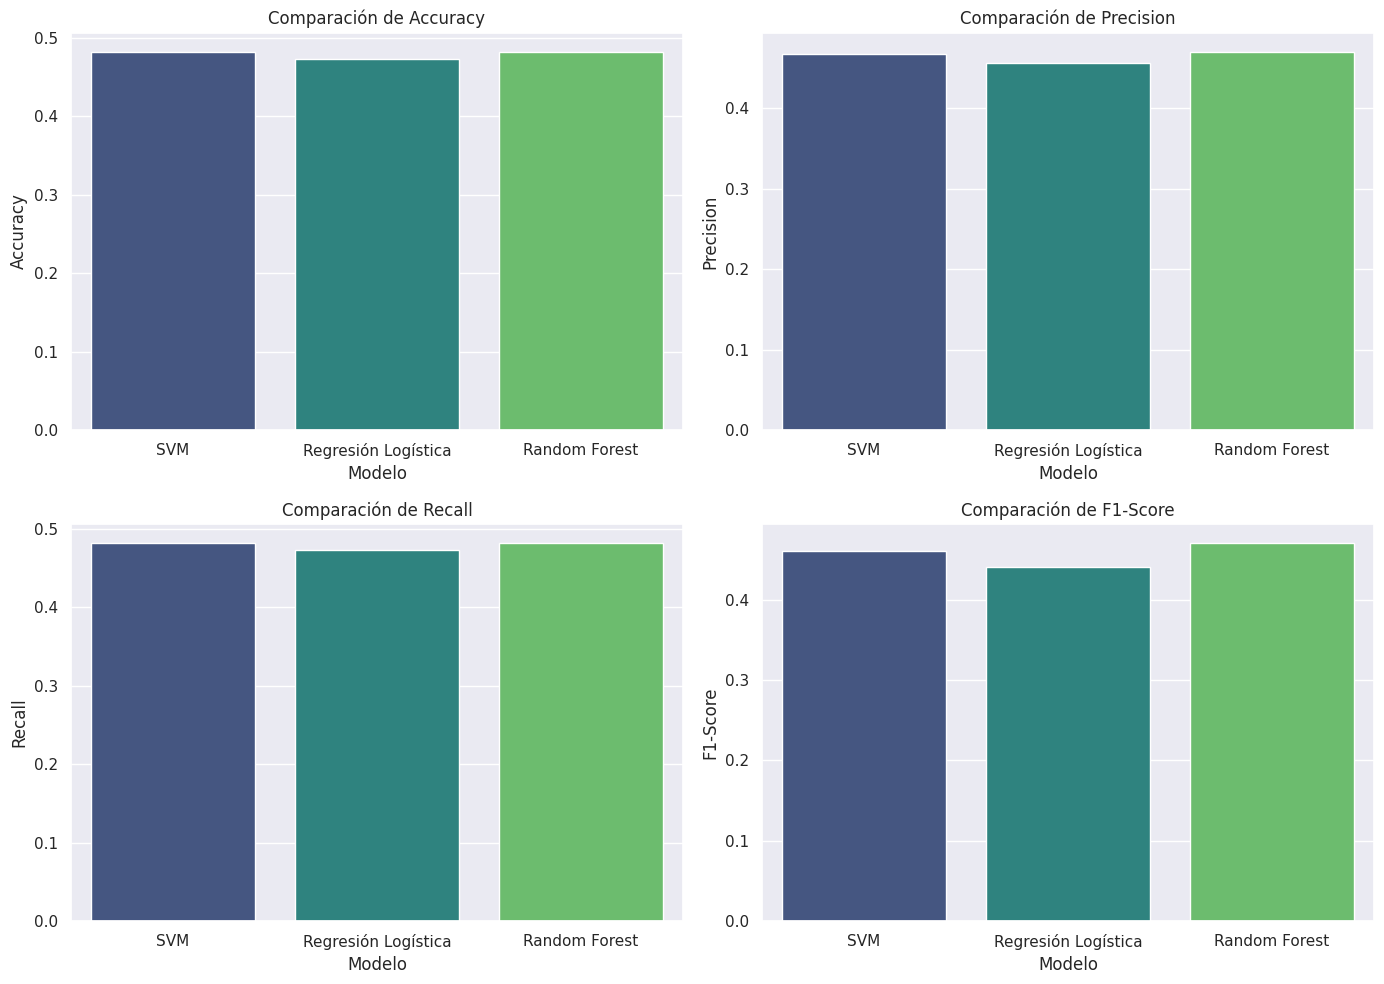

In [55]:
# Creación de gráficos de barras para cada métrica
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
sns.barplot(
    x="Modelo",
    y="Accuracy",
    data=df_results,
    ax=axs[0, 0],
    palette="viridis",
    hue="Modelo",
)
axs[0, 0].set_title("Comparación de Accuracy")
axs[0, 0].set_ylabel("Accuracy")

# Precision
sns.barplot(
    x="Modelo",
    y="Precision",
    data=df_results,
    ax=axs[0, 1],
    palette="viridis",
    hue="Modelo",
)
axs[0, 1].set_title("Comparación de Precision")
axs[0, 1].set_ylabel("Precision")

# Recall
sns.barplot(
    x="Modelo",
    y="Recall",
    data=df_results,
    ax=axs[1, 0],
    palette="viridis",
    hue="Modelo",
)
axs[1, 0].set_title("Comparación de Recall")
axs[1, 0].set_ylabel("Recall")

# F1-Score
sns.barplot(
    x="Modelo",
    y="F1-Score",
    data=df_results,
    ax=axs[1, 1],
    palette="viridis",
    hue="Modelo",
)
axs[1, 1].set_title("Comparación de F1-Score")
axs[1, 1].set_ylabel("F1-Score")

# Ajustar el layout
plt.tight_layout()
plt.show()

In [56]:
# Mostrar las matrices de confusión para cada modelo
models = ["SVM", "Regresión Logística", "Random Forest"]
predictions = [svm_predictions, logreg_predictions, rf_predictions]

In [57]:
# Generar el reporte de clasificación
for i, model in enumerate(models):
    report = classification_report(
        y_test, predictions[i], target_names=label_encoder.classes_
    )
    print(f"Reporte de Clasificación modelo ({model}):\n", report)

Reporte de Clasificación modelo (SVM):
               precision    recall  f1-score   support

       Medio       0.41      0.23      0.29      3421
       Menor       0.51      0.70      0.59      3691
    Superior       0.49      0.49      0.49      3228

    accuracy                           0.48     10340
   macro avg       0.47      0.48      0.46     10340
weighted avg       0.47      0.48      0.46     10340

Reporte de Clasificación modelo (Regresión Logística):
               precision    recall  f1-score   support

       Medio       0.41      0.16      0.23      3421
       Menor       0.50      0.70      0.58      3691
    Superior       0.46      0.54      0.50      3228

    accuracy                           0.47     10340
   macro avg       0.46      0.47      0.44     10340
weighted avg       0.46      0.47      0.44     10340

Reporte de Clasificación modelo (Random Forest):
               precision    recall  f1-score   support

       Medio       0.39      0.28    

## Resumen General de los Modelos

### SVM y Random Forest

- **Rendimiento Similar:** Ambos modelos tienen un rendimiento similar con un F1-Score ponderado alrededor de 0.47.
- **Diferencias Específicas:**
  - Random Forest tiende a tener un mejor **recall** para la clase "Menor".
  - Sin embargo, muestra un F1-Score más bajo en la clase "Medio" en comparación con SVM.

### Regresión Logística

- **Rendimiento Inferior:** Este modelo tiene un rendimiento ligeramente inferior en comparación con los otros dos, especialmente en la clase "Medio", donde presenta un **recall** más bajo (0.16).

### Observaciones Generales

- **Dificultades en la Clasificación:** En general, todos los modelos están teniendo dificultades para distinguir entre las clases "Medio", "Menor", y "Superior", lo cual se refleja en un F1-Score moderado en todas las clases.
- **Ventaja de Random Forest:** A pesar de las dificultades generales, el modelo Random Forest parece tener una ligera ventaja en términos de balance entre precisión y recall.

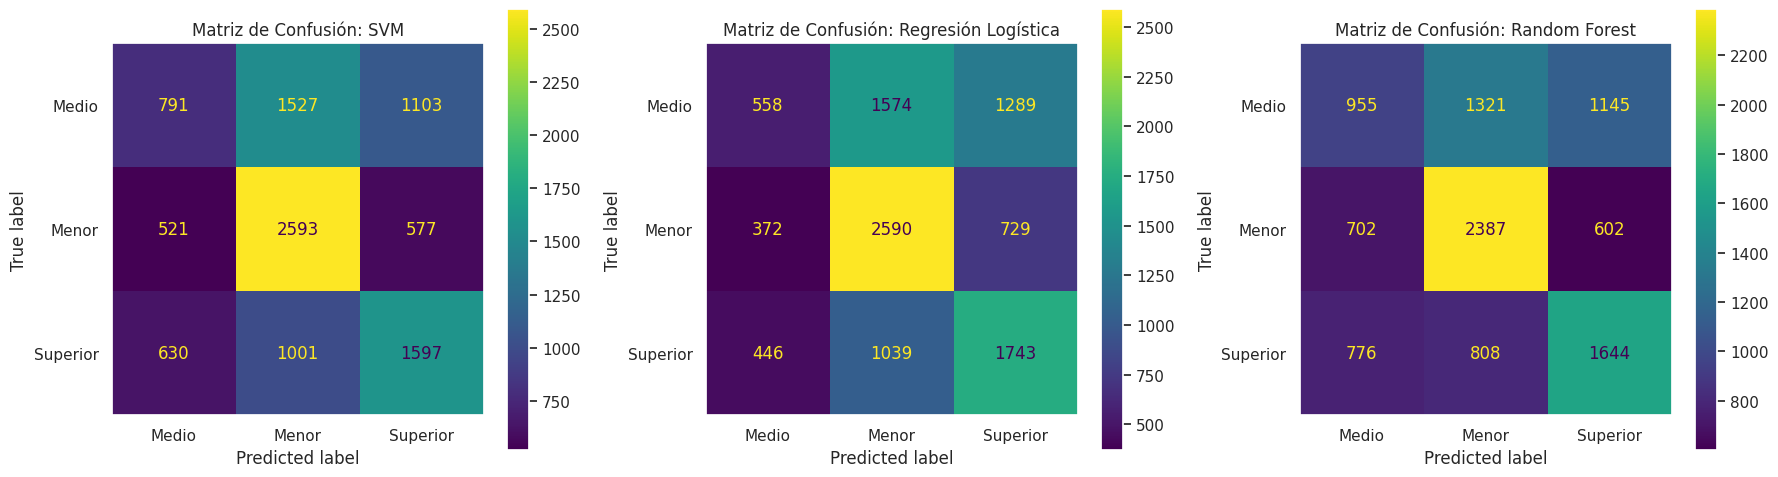

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, model in enumerate(models):
    cm = confusion_matrix(y_test, predictions[i])
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=label_encoder.classes_
    )
    disp.plot(ax=axes[i])
    axes[i].grid(False)
    axes[i].set_title(f"Matriz de Confusión: {model}")

plt.tight_layout()
plt.show()

### Interpretación de las Matrices de Confusión

### 1. SVM

**Fortalezas:**
- Clasifica adecuadamente un número moderado de instancias en la clase "Menor" (2593).

**Debilidades:**
- Tiene dificultades para diferenciar entre "Medio" y "Menor", con 1527 instancias de "Medio" clasificadas incorrectamente como "Menor".
- Confunde frecuentemente "Superior" con "Menor" (1001 instancias).

### 2. Regresión Logística

**Fortalezas:**
- Mejor rendimiento en la clasificación de la clase "Superior" (1743 instancias correctamente clasificadas) comparado con SVM.

**Debilidades:**
- Similar a SVM, lucha por diferenciar "Medio" de "Menor", con 1574 instancias de "Medio" clasificadas como "Menor".
- Alto número de errores al clasificar "Medio" como "Superior" (1289 instancias).

### 3. Random Forest

**Fortalezas:**
- Mejor rendimiento general entre los tres modelos, especialmente en la clase "Menor" (2387 instancias correctamente clasificadas) y "Superior" (1644 instancias correctamente clasificadas).
- Muestra un mejor equilibrio en la clasificación de todas las clases.

**Debilidades:**
- Aún tiene errores significativos al clasificar "Medio", con 1321 instancias clasificadas incorrectamente como "Menor" y 1145 como "Superior".

### Conclusión

- **Random Forest** se destaca como el mejor modelo en términos de precisión general y equilibrio entre las clases, aunque aún existen áreas de mejora, especialmente en la clasificación de "Medio".
- **SVM y Regresión Logística** presentan debilidades similares, luchando principalmente con la diferenciación entre "Medio" y "Menor".




## Actividad 4

In [144]:
# Random Forest con búsqueda por grilla
param_grid = {
    "n_estimators": [150], # Probar diferentes números de árboles
    "max_depth": [10, 15, 20], # Probar diferentes profundidades del árbol
    "max_features": ['sqrt'], # Probar diferentes estrategias de selección de características
    "min_samples_split": [8, 16, 20], # Probar diferentes mínimos de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4], # Probar diferentes mínimos de muestras en una hoja
}

In [145]:
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="f1_macro",
)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

In [146]:
best_rf_model

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=150)

In [147]:
# Mostrar los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
best_params

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 150}

In [155]:
# Entrenar el modelo final con los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
rf_predictions = best_rf_model.predict(X_test)
y_score = best_rf_model.predict_proba(X_test)

In [156]:
# Generar el reporte de clasificación
report = classification_report(
    y_test, rf_predictions, target_names=label_encoder.classes_
)
print("Reporte de Clasificación modelo (Random Forest Mejorado):\n", report)

Reporte de Clasificación modelo (Random Forest Mejorado):
               precision    recall  f1-score   support

       Medio       0.40      0.24      0.30      3421
       Menor       0.53      0.68      0.59      3691
    Superior       0.49      0.54      0.51      3228

    accuracy                           0.49     10340
   macro avg       0.47      0.48      0.47     10340
weighted avg       0.47      0.49      0.47     10340



### Interpretación

### Precisión y Recall:

- **Mejoras en "Superior" y "Menor":** Hubo mejoras en la clase "Superior" y "Menor", con un aumento tanto en la precisión como en el recall. Esto sugiere que el modelo mejorado es más eficaz en identificar correctamente estas clases.
  
- **"Medio":** Aunque la precisión mejoró ligeramente, el recall para "Medio" disminuyó. Esto implica que el modelo mejorado está identificando menos instancias de "Medio" correctamente, aunque con mayor precisión cuando lo hace.

### F1-Score:

- **Mejoras Moderadas:** El F1-score mejoró ligeramente para las clases "Menor" y "Superior", lo que indica un mejor equilibrio entre precisión y recall para estas clases.
  
- **Disminución en "Medio":** El F1-score para "Medio" disminuyó, lo que refleja el desafío continuo en la clasificación de esta clase.

### Exactitud Global:

- **Ligeramente Mejorada:** La exactitud global del modelo aumentó ligeramente de 0.47 a 0.49, lo que indica una mejora general en el rendimiento.


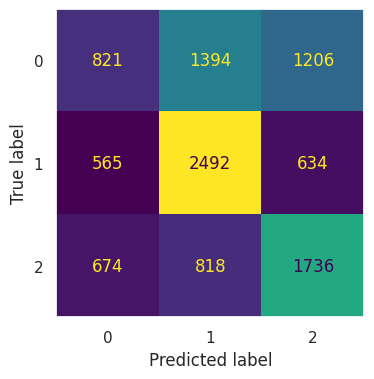

In [157]:
# Mostrar la matriz de confusión del modelo mejorado
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions, ax=ax, colorbar=False)
ax.grid(False)

### Interpretación de la matriz de confusión

**Fortalezas:**

- **Clase "Menor":** El modelo mejorado sigue mostrando un rendimiento fuerte en la clase "Menor", con 2492 instancias correctamente clasificadas.
- **Clase "Superior":** Ha mejorado ligeramente en la clasificación de "Superior", con 1736 instancias correctamente clasificadas.

**Debilidades:**

- **Clase "Medio":** El modelo mejorado aún tiene dificultades significativas para clasificar correctamente "Medio", con 1394 instancias clasificadas incorrectamente como "Menor" y 1206 como "Superior". Esto representa una confusión considerable entre estas clases, similar a lo observado en el modelo no mejorado.

### Comparación con el Modelo Random Forest No Mejorado

- **Mejoras:** Aunque el modelo mejorado mantiene un buen rendimiento en "Menor" y ha mejorado en "Superior", los problemas con la clase "Medio" persisten y siguen siendo una debilidad clave.
- **Equilibrio:** El modelo mejorado muestra un equilibrio similar al no mejorado, pero las mejoras en "Superior" sugieren que el ajuste de los hiperparámetros ha sido parcialmente efectivo.


In [158]:
# Determinar la importancia de las características usando el mejor modelo (Random Forest)
feature_importances = best_rf_model.feature_importances_
feature_importances_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": feature_importances}
).sort_values(by="Importance", ascending=False)

feature_importances_df

,Feature,Importance
26,kw_avg_avg,0.040836
25,kw_max_avg,0.035772
0,timedelta,0.033855
42,LDA_04,0.030069
38,LDA_00,0.030059
40,LDA_02,0.029478
39,LDA_01,0.028495
23,kw_avg_max,0.028137
27,self_reference_min_shares,0.028079
5,n_non_stop_unique_tokens,0.027980


## Actividad 5

In [159]:
# Binarizar las etiquetas para el ROC multiclase
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

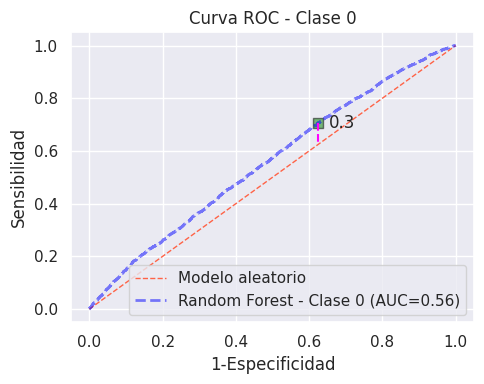

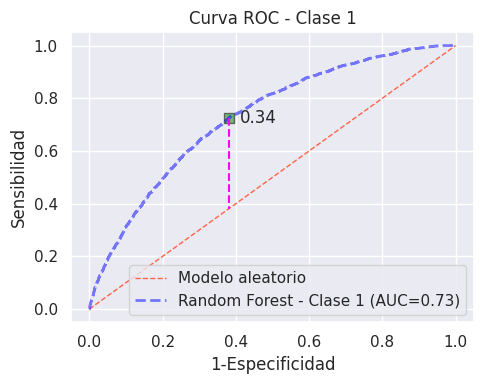

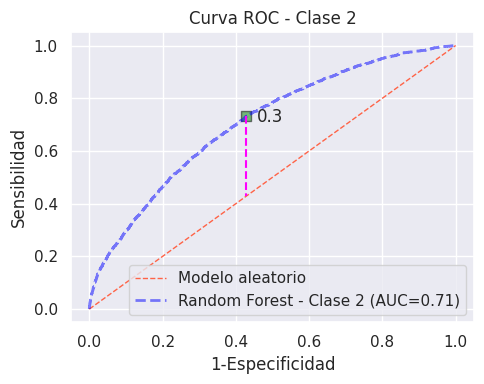

In [160]:
# Calcular ROC, AUC, y el umbral óptimo para cada clase
for i in range(n_classes):
    y_pred_proba = y_score[:, i]
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_pred_proba)
    auc_ = roc_auc_score(y_test_binarized[:, i], y_pred_proba)
    idx_umbral_op = np.argmax(tpr - fpr)
    umbral_op = thresholds[idx_umbral_op]

    # Crear el plot
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.plot([0, 1], [0, 1], ls="--", lw=1, color="tomato", label="Modelo aleatorio")
    ax.plot(
        fpr,
        tpr,
        ls="--",
        lw=2,
        color="blue",
        alpha=0.5,
        label=f"Random Forest - Clase {i} (AUC={np.round(auc_, 2)})",
    )

    op_point = (fpr[idx_umbral_op], tpr[idx_umbral_op])

    ax.scatter(
        [op_point[0]],
        [op_point[1]],
        color="green",
        s=50,
        marker="s",
        edgecolors="black",
        alpha=0.5,
    )

    ax.plot(
        [op_point[0], op_point[0]],
        [op_point[1], op_point[0] * 1],
        ls="--",
        color="magenta",
    )

    ax.text(
        fpr[idx_umbral_op] + 0.03, tpr[idx_umbral_op] - 0.02, np.round(umbral_op, 2)
    )

    ax.set_xlabel("1-Especificidad")
    ax.set_ylabel("Sensibilidad")
    ax.set_title(f"Curva ROC - Clase {i}")
    ax.legend()

    plt.tight_layout()
    plt.show()

Clase 0 - AUC: 0.56
Clase 0 - Umbral Óptimo: 0.2992051194870707

Clase 1 - AUC: 0.73
Clase 1 - Umbral Óptimo: 0.3413400201228343

Clase 2 - AUC: 0.71
Clase 2 - Umbral Óptimo: 0.2998027927946989



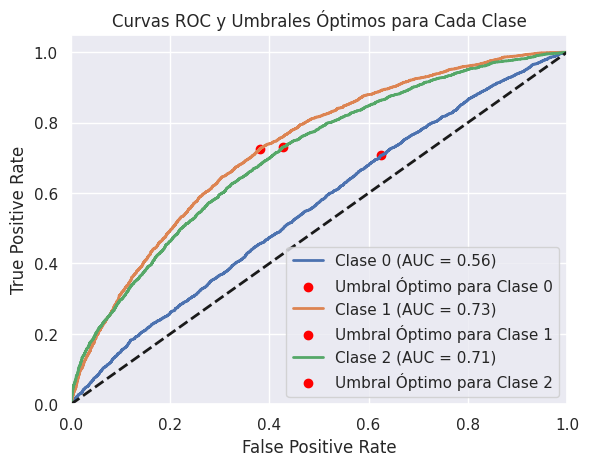

In [161]:
# Calcular ROC, AUC, y el umbral óptimo para cada clase
for i in range(n_classes):
    y_pred_proba = y_score[:, i]
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_pred_proba)
    auc_ = roc_auc_score(y_test_binarized[:, i], y_pred_proba)
    idx_umbral_op = np.argmax(tpr - fpr)
    umbral_op = thresholds[idx_umbral_op]

    print(f"Clase {i} - AUC: {auc_:.2f}")
    print(f"Clase {i} - Umbral Óptimo: {umbral_op}\n")

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {auc_:.2f})")
    plt.scatter(
        fpr[idx_umbral_op],
        tpr[idx_umbral_op],
        marker="o",
        color="red",
        label=f"Umbral Óptimo para Clase {i}",
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC y Umbrales Óptimos para Cada Clase")
plt.legend(loc="lower right")
plt.show()

## Análisis de las Curvas ROC por Clase

### 1. Clase 0 (Medio)

- **AUC = 0.56:**
  - Este AUC indica un rendimiento ligeramente mejor que un modelo aleatorio, pero no es suficientemente bueno. Un AUC de 0.56 sugiere que el modelo tiene una capacidad limitada para distinguir correctamente entre la clase "Medio" y las otras clases.

- **Umbral Óptimo = 0.299:**
  - El umbral óptimo de 0.299 indica el punto donde se maximiza la diferencia entre la TPR (sensibilidad) y FPR (1-especificidad). Sin embargo, dado el bajo AUC, ajustar este umbral podría no ser suficiente para mejorar significativamente el rendimiento en esta clase.

### 2. Clase 1 (Menor)

- **AUC = 0.73:**
  - Un AUC de 0.73 es razonablemente bueno, lo que indica que el modelo tiene una capacidad moderadamente buena para distinguir correctamente la clase "Menor" de las otras. Este es el mejor AUC entre las clases, lo que concuerda con el rendimiento relativamente mejor observado en las métricas anteriores.

- **Umbral Óptimo = 0.341:**
  - Un umbral de 0.341 es apropiado para maximizar la discriminación entre las clases, pero es posible que todavía se puedan hacer mejoras para aumentar la precisión o la sensibilidad dependiendo de la prioridad de la tarea.

### 3. Clase 2 (Superior)

- **AUC = 0.71:**
  - Un AUC de 0.71 muestra que el modelo tiene una capacidad decente para clasificar correctamente la clase "Superior", pero aún hay margen para mejoras. Este valor es más bajo que el de "Menor" pero mejor que "Medio".

- **Umbral Óptimo = 0.299:**
  - Este umbral sugiere que en este punto se maximiza la precisión del modelo para la clase "Superior", similar al de "Medio".

### Análisis

El análisis de las Curvas ROC revela que el modelo tiene un rendimiento aceptable para las clases "Menor" y "Superior", con AUC de 0.73 y 0.71 respectivamente. Sin embargo, el AUC de 0.56 para la clase "Medio" indica que el modelo tiene dificultades significativas en esta área.


## Propuestas de Mejora

### 1. Ingeniería de Características

- **Interacciones Entre Características:** Explorar combinaciones de características que puedan revelar patrones ocultos.
- **Eliminación de Características Irrelevantes:**
  - **Análisis de Importancia:** Identificar y eliminar características que no contribuyen significativamente al rendimiento del modelo o que introducen ruido.

### 2. Manejo de Clases Desbalanceadas

- **Técnicas de Sobremuestreo/Submuestreo:**
  - **SMOTE:** Aplicar SMOTE para equilibrar las clases minoritarias.
  - **Submuestreo de Clases Mayoritarias:** Reducir el número de instancias en clases mayoritarias para equilibrar el dataset.

### 3. Ajuste de Hiperparámetros

- **Ajustes Específicos:**
  - **Reducir `min_samples_split` y `min_samples_leaf`:** Permitir que los árboles crezcan más profundamente para capturar más detalles de los datos.

## Conclusión

El modelo Random Forest actual muestra un rendimiento aceptable en las clases "Menor" y "Superior" pero enfrenta desafíos al clasificar la clase "Medio". Implementar las mejoras sugeridas, puede conducir a mejoras significativas en el rendimiento general del modelo.
